In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
from pyjet import cluster
from pyjet.testdata import get_event
from pyjet import DTYPE_EP
from pyjet import DTYPE_PTEPM
from pyjet import PseudoJet, JetDefinition, ClusterSequence, ClusterSequenceArea


## Get data, transform ROOT tree into array

In [2]:
file = ur.open('rec_.root')
tree = file['events']
ak_arrays = tree.arrays()

In [3]:
def get_vector(varname='HcalBarrelHitsReco',energy='energy'):
    E = np.array(ak.to_list(ak_arrays["%s.%s"%(varname,energy)]), dtype="O")
    x = np.array(ak.to_list(ak_arrays["%s.position.x"%varname]), dtype="O")
    y = np.array(ak.to_list(ak_arrays["%s.position.y"%varname]), dtype="O")
    z = np.array(ak.to_list(ak_arrays["%s.position.z"%varname]), dtype="O")
    theta = np.array(ak.to_list(ak_arrays["%s.polar.theta"%varname]), dtype="O")
    phi = np.array(ak.to_list(ak_arrays["%s.polar.phi"%varname]), dtype="O")
    #E = E/1000.0
    return E,x, y, z, theta, phi

In [4]:
E = {}
x = {}
y = {}
z  = {}
theta={}
phi = {}

## Get clusters

In [5]:
for i in ['HcalHadronEndcapClusters','EcalEndcapClusters']:
    E[i], x[i], y[i],z[i], theta[i], phi[i] = get_vector("%s"%i,energy='energy')

## Initialize fast jet 

In [6]:
vectors = get_event()
sequence = cluster(vectors, R=1.0, p=-1)
jets = sequence.inclusive_jets()  # list of PseudoJets

In [45]:
jet_E = np.array([])
jet_eta = np.array([])

for ievt in range(1000):
    constituents = np.array([], dtype=DTYPE_PTEPM)#DTYPE_EP)
    for i in range(len(E['HcalHadronEndcapClusters'][ievt])):
        part_energy = E['HcalHadronEndcapClusters'][ievt][i]/1000.0
        if(part_energy<0.5):
            continue
        part_phi = phi['HcalHadronEndcapClusters'][ievt][i]
        part_theta = theta['HcalHadronEndcapClusters'][ievt][i]
        part_eta = -np.log(np.tan(part_theta/2.0))
        part_pt  = part_energy*np.sin(part_theta)
        #print('Energy=%2.2f GeV, phi =%2.2f rad, theta= %2.2f rad, eta=%2.2f, pT = %2.2f GeV'%(part_energy,part_phi,part_theta, part_eta,part_pt))
        cluster = np.array([(part_pt, part_eta, part_phi, 0.0)], dtype=DTYPE_PTEPM)
        constituents = np.append(constituents, cluster)

    for i in range(len(E['EcalEndcapClusters'][ievt])):
        part_energy = E['EcalEndcapClusters'][ievt][i]/1000.0
        if(part_energy<0.100):
            continue
        part_phi = phi['EcalEndcapClusters'][ievt][i]
        part_theta = theta['EcalEndcapClusters'][ievt][i]
        part_eta = -np.log(np.tan(part_theta/2.0))
        part_pt  = part_energy*np.sin(part_theta)
        #print('Energy=%2.2f GeV, phi =%2.2f rad, theta= %2.2f rad, eta=%2.2f, pT = %2.2f GeV'%(part_energy,part_phi,part_theta, part_eta,part_pt))
        cluster = np.array([(part_pt, part_eta, part_phi, 0.0)], dtype=DTYPE_PTEPM)
        constituents = np.append(constituents, cluster)
        
        
    ### Jet reconstruction    
    jet_def = JetDefinition(algo = 'genkt', R = 1.0,p=-1.0)
    cs = ClusterSequence(constituents, jet_def) 
    jets = cs.inclusive_jets()
    #print(jets.pt)
    for jet in jets:
        if(jet.pt<5): continue
        print(jet.pt*np.cosh(jet.eta))
        jet_E = np.append(jet.pt*np.cosh(jet.eta),jet_E)
        jet_eta = np.append(jet.eta,jet_eta)

#print(constituents)
#print(jet_E)
#print(jet_eta)

117.5494173115403
64.36031759035131
39.82027702737213
20.130703209713683
55.378579448190514
46.6121119329892
53.672222385430366
58.509619552431396
38.031499651941694
74.07990046094716
87.16103384718546
15.236533463303005
34.05613113469632
14.042244521814066
37.50941267523777
47.994530258651004
55.68414233852588
21.591863613968947
24.947183803208134
32.643808776264976
40.42081601073781
103.69264954760418
100.23809650425189
39.25097764835519
61.02895596585157
45.56971863725351
37.84107953809553
46.729059057155624
25.809292455281764
39.56010546594087
82.65420392615516
80.39804971744876
144.312532282873
93.86813749607371
35.9033542832683
26.163892932997403
23.269268219432984
12.539991036766523
50.29152107153384
52.050532458308965
42.5069663922181
52.72630018088864
40.52608769381884
45.69310027826237
99.34227031873601
37.240692679294575
12.188606137943712
64.85304184643074
51.93110238322986
123.28322147757731
29.392663758693324
84.81013164219993
101.46917979846765
11.509242687647214
79.5195

In [8]:
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib import rc
rc('text', usetex=True)
#hep.set_style(hep.style.CMS)
hep.set_style("CMS")

In [9]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties

from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS")

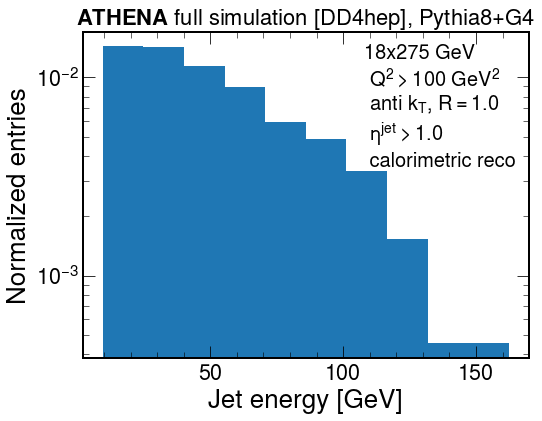

In [63]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.hist(jet_E,density=True)

plt.text(0.80, 0.77,'18 x 275 GeV \n $Q^{2}>100~GeV^{2}$ \n anti $k_{T}$, $R=1.0$ \n $\eta^{jet}>1.0$ \n calorimetric reco',
                 horizontalalignment='center',multialignment='left',
                 verticalalignment='center',transform = ax.transAxes, fontsize=20)
plt.title(r"$\bf{ATHENA}$"+' full simulation [DD4hep], Pythia8+G4',fontsize=22)
plt.ylabel('Normalized entries')
plt.xlabel('Jet energy [GeV]')
plt.yscale('log')
plt.show()

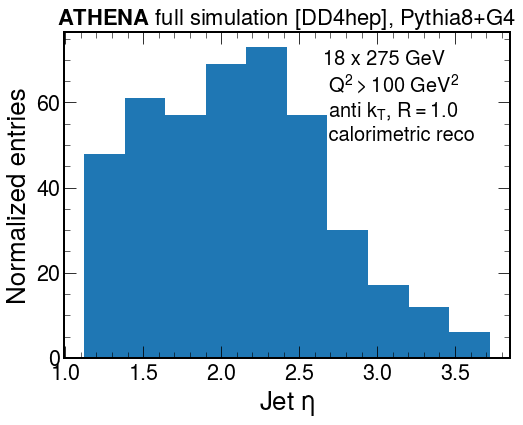

In [66]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.hist(jet_eta)

plt.text(0.75, 0.8,'18 x 275 GeV \n $Q^{2}>100~GeV^{2}$ \n anti $k_{T}$, $R=1.0$\n calorimetric reco',
                 horizontalalignment='center',multialignment='left',
                 verticalalignment='center',transform = ax.transAxes, fontsize=20)
plt.title(r"$\bf{ATHENA}$"+' full simulation [DD4hep], Pythia8+G4',fontsize=22)
plt.ylabel('Normalized entries')
plt.xlabel('Jet $\eta$')
plt.show()